<a href="https://colab.research.google.com/github/Arka1212/Netflix-Movies-And-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [186]:
# IMPORTING NECESSARY LIBRARIES.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy.stats import norm
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
# MOUNTING THE DRIVE.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# COPYING PATH.
path = '/content/drive/MyDrive/Capstone Projects/Unsupervised Machine Learning/Netflix movies & TV shows clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(path)

In [4]:
df.head()

# Glimpse of first 5 rows of dataset.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.tail()

# Glimpse of last 5 rows of dataset.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
# SHAPE OF DATASET.
df.shape

# Rows = 7787 & Columns = 12

(7787, 12)

In [7]:
# COLUMNS.
df.columns 

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
# DATASET INFORMATION.
df.info()

# Seems that there are some null or missing values in the dataset.
# Almost all the columns are categorical except the 'release_year' column which is the only one column having int64 data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
# NULL VALUE INSPECTION.
df.isnull().sum()

# 2389 null values are present in 'director' column.
# 718 null values are present in 'cast' column.
# 507 null values are present in 'country' column.
# 10 null values are present in 'date_added' column.
# 7 null values are present in 'rating' column.

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
# NULL RATE.
for col in df.columns:
  null_rate = ((df[col].isna().sum())/len(df))*100
  if null_rate > 0:
    print("'{}' null rate ------> {}%".format(col,round(null_rate,2)))

# Null rate for 'director' column is 30.68%.
# Null rate for 'cast' column is 9.22%.
# Null rate for 'country' column is 6.51%.
# Null rate for 'date_added' column is 0.13%.
# Null rate for 'rating' column is 0.09%.

'director' null rate ------> 30.68%
'cast' null rate ------> 9.22%
'country' null rate ------> 6.51%
'date_added' null rate ------> 0.13%
'rating' null rate ------> 0.09%


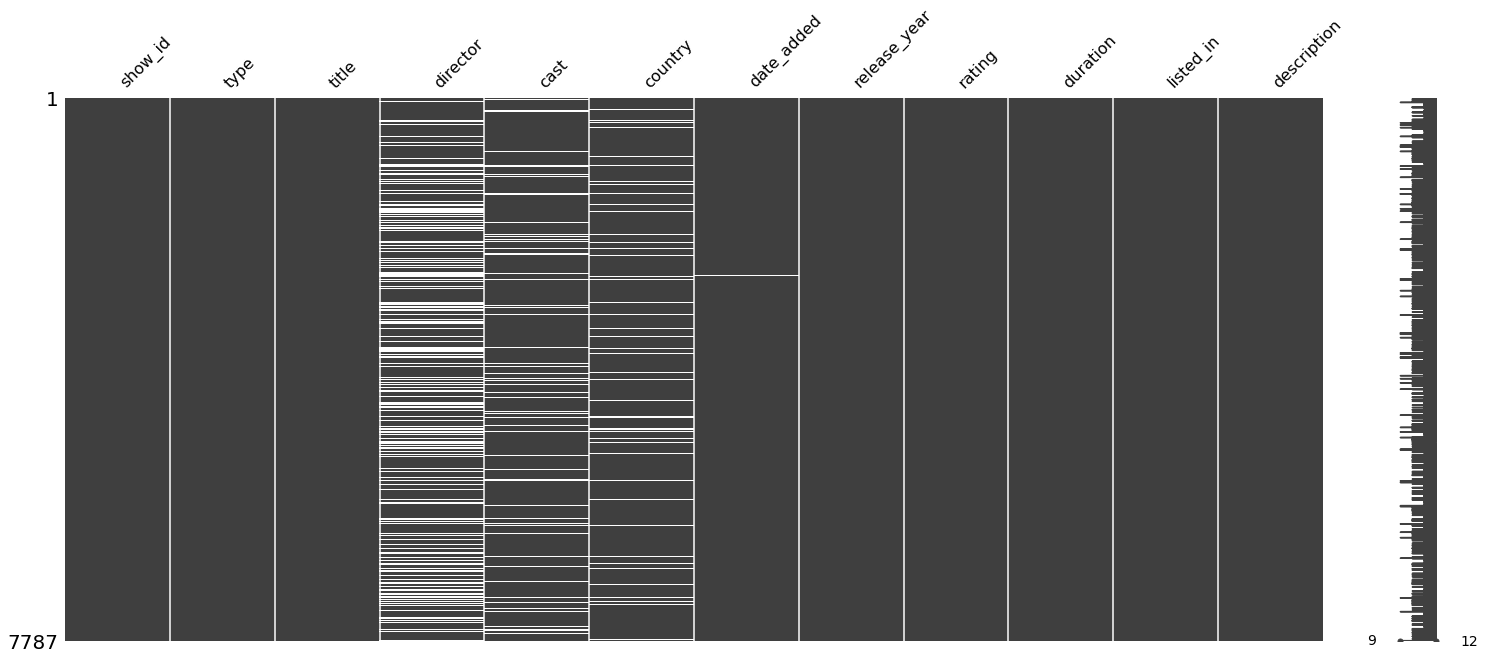

In [11]:
# MISSING VALUE VISUALISATION.
msno.matrix(df)
plt.show()

In [12]:
# TOTAL NULL VALUE COUNT.
df.isnull().sum().sum()

# In total, there are 3631 null values in this particular dataset.

3631

In [13]:
# DUPLICATE VALUE COUNT.
df.duplicated().sum()

# No duplicate values are present in the dataset.

0

In [14]:
# DATA DESCRIPTION.
df.describe(include='all')

# Except one, all other columns are actually categorical so most of them don't have any min, max or quantile values.
# oldest content released in the year 1925.
# 25% of the content was added by 2013.
# 50% of the content was added by 2017.
# 75% of the content was added by 2018.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [128]:
# COPYING DATA.
netflix_df = df.copy()

# Copying the dataset so as to keep the original dataset intact.

## **Data Cleaning & Pre-processing**

Dealing with the null values in "country" column.

In [129]:
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])

# Replacing null values in 'country' column with the mode (most common) country.

Dealing with the null values in 'cast' column.

In [130]:
netflix_df['cast'] = netflix_df['cast'].fillna('')

# Replacing null values in 'cast' column with empty string.

Dealing with the null values in 'director' column.

In [131]:
netflix_df['director'] = netflix_df['director'].fillna('')

# Replacing null values in 'director' column with empty string.

Dealing with the null values in 'date_added' column.

In [132]:
netflix_df['date_added'] = netflix_df['date_added'].fillna('')

# # Replacing null values in 'date_added' column with empty string.

In [133]:
# RE-CHECKING NULL VALUES.
netflix_df.isnull().sum()

# Only 7 of all the null values are present is left.

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          7
duration        0
listed_in       0
description     0
dtype: int64

In [134]:
netflix_df.dropna(inplace = True)

# Removing those remaining null values from the dataset.

In [135]:
netflix_df.isnull().sum()

# Finally, no more null values are present in the dataset.

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [140]:
# DROPPING UNECESSARY COLUMNS.
netflix_df = netflix_df.drop(['show_id'],axis = 1)

# As 'show_id' is an irrelevant column for this particular purpose, so its removed.

## **Exploratory Data Analysis (EDA)**

In [145]:
# TYPE OF CONTENT.
netflix_df['type'].value_counts()

# There are basically two types of content available : Movie & TV Shows.
# Total count of movies are 5372.
# Total count of TV shows are 2408.
# Clearly, movies are much more than tv shows in this dataset.

Movie      5372
TV Show    2408
Name: type, dtype: int64

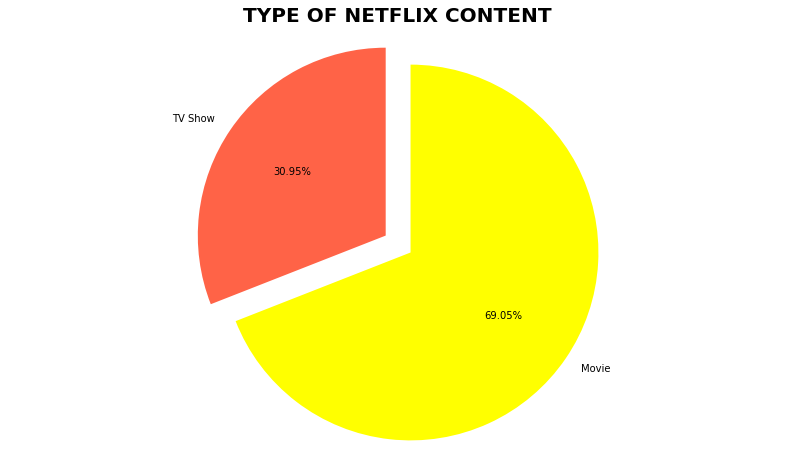

In [184]:
# PERCENTAGE SHARE OF CONTENT TYPE.
plt.figure(figsize=(14, 8))
labels=['TV Show', 'Movie']
plt.pie(netflix_df['type'].value_counts().sort_values(),labels=labels,explode=[0.08,0.08],
        autopct='%1.2f%%',colors=['tomato','yellow'], startangle=90)
plt.title('TYPE OF NETFLIX CONTENT',fontsize=20,fontweight='bold')
plt.axis('equal')
plt.show()

# 69.05% of total content are movies whereas only 30.95% of total content are TV shows.

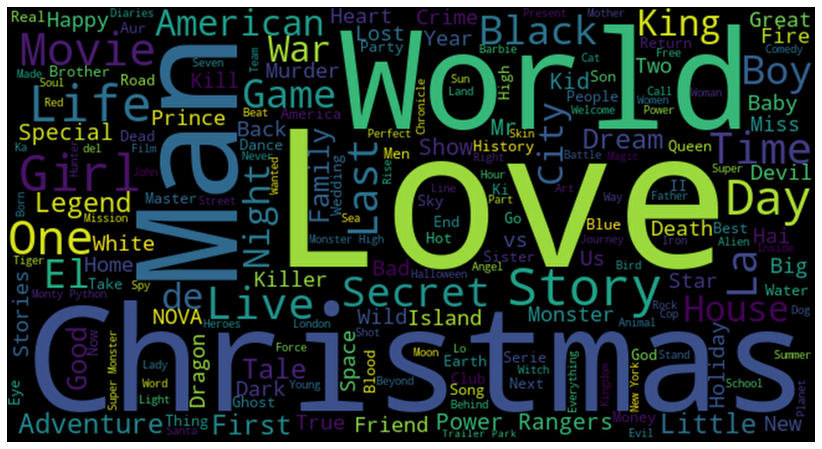

In [157]:
# ANALYSIS OF TITLES OF CONTENT.
plt.figure(figsize= (16, 8))
title_words = " ".join(word for word in netflix_df['title'])
stopwords = set(STOPWORDS)

title_cloud = WordCloud(stopwords=stopwords, background_color="black",width=650, height=350).generate(title_words)
plt.imshow(title_cloud, interpolation='bessel')
plt.axis("off")
plt.show()

# 'Christmas', 'Love', 'Man', 'World' are some of the most utilized words for movie titles.

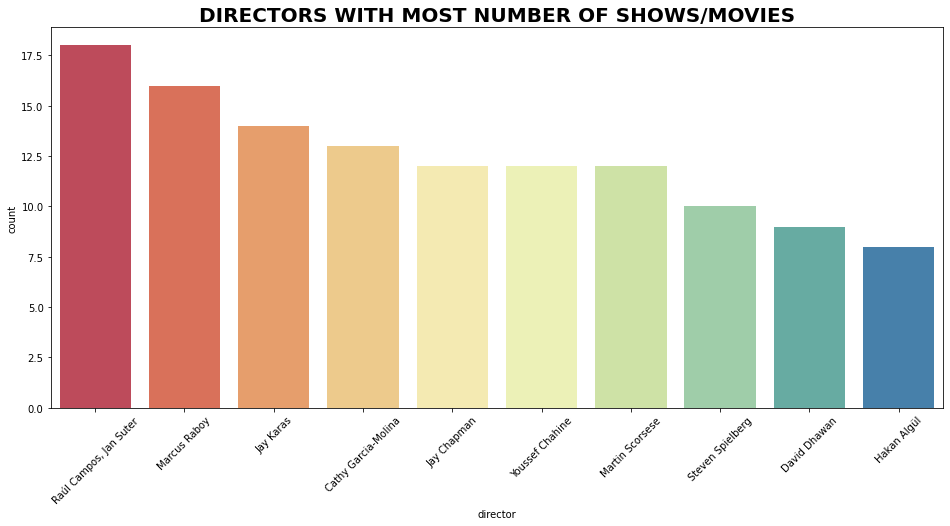

In [183]:
# ANALYSIS ON DIRECTORS.
plt.figure(figsize = (16,7))
netflix_directors =netflix_df[netflix_df['director'] != '']
sns.countplot(x='director',data=netflix_directors,order=netflix_directors.director.value_counts().head(10).index,palette='Spectral')
plt.title('DIRECTORS WITH MOST NUMBER OF SHOWS/MOVIES',fontsize=20,fontweight='bold')
plt.xticks(rotation = 45)
plt.show()

# 'Raul Campos and Jan Suter' have most number of contents in this particular dataset.

In [178]:
# COUNT OF COUNTRIES.
netflix_df['country'].value_counts()

# Need to pre-process a bit for better visualisation.

United States                                                   3058
India                                                            923
United Kingdom                                                   397
Japan                                                            225
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [188]:
country_data = netflix_df['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)
top5country = country_count.head(5)

# Pre-processed the data and is ready for visualisation.

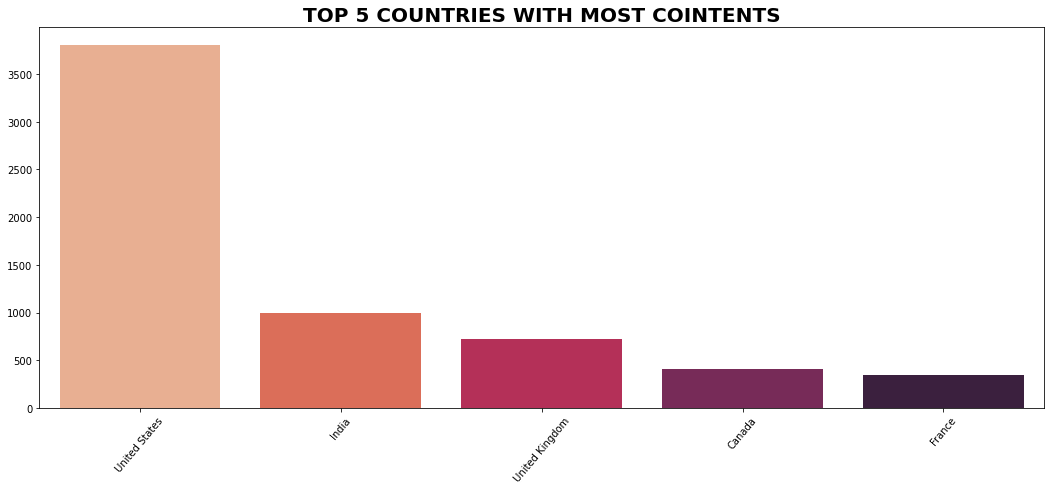

In [201]:
plt.figure(figsize=(18,7))
sns.barplot(x= top5country.index, y=top5country, palette='rocket_r')
plt.xticks(rotation=50)
plt.title('TOP 5 COUNTRIES WITH MOST COINTENTS', fontsize=20, fontweight='bold')
plt.show()

# Top 5 countries with most contents are 'United States', 'India', 'United Kingdom', 'Canada' and 'France'.
# However, 'United States' tops the list with maximum number of contents.